<a href="https://colab.research.google.com/github/Gzim30/Gzim30/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving heartdisease-1 (2).csv to heartdisease-1 (2).csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans - Unique Labels: [0 1]
KMeans - Silhouette Score: 0.17511353215805028


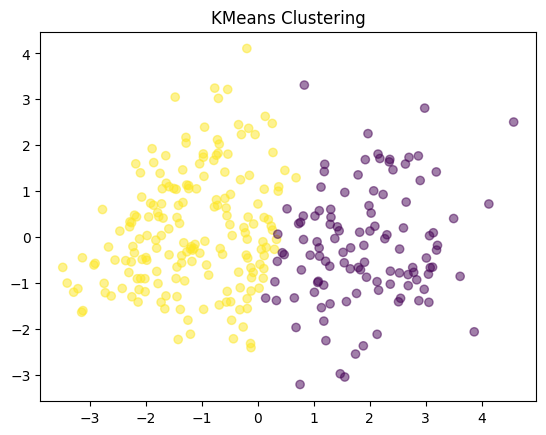

Agglomerative - Unique Labels: [0 1]
Agglomerative - Silhouette Score: 0.13171533189500462


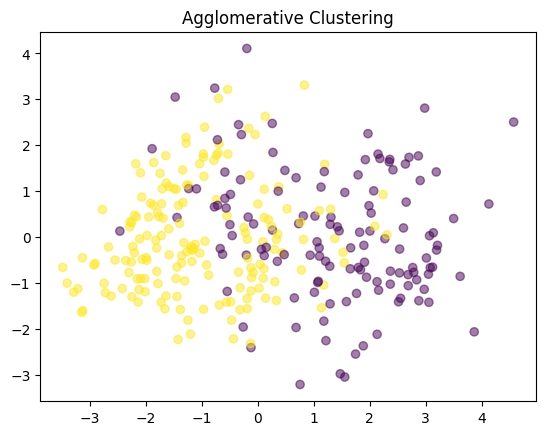

DBSCAN - Unique Labels: [ 0  1  2 -1  3  4  5  6  7]
DBSCAN - Silhouette Score: 0.017927639355543003


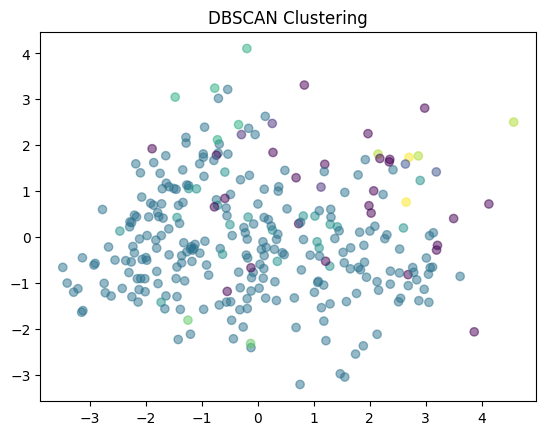

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Load the dataset
file_path = "heartdisease-1 (2).csv"
df = pd.read_csv(file_path)

# Exclude the last feature
X = df.iloc[:, :-1]

# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Clustering algorithms
algorithms = {
    "KMeans": KMeans(n_clusters=2),
    "Agglomerative": AgglomerativeClustering(n_clusters=2),
    "DBSCAN": DBSCAN(eps=3, min_samples=2)
}

# Running clustering algorithms and visualize results
for name, algorithm in algorithms.items():
    labels = algorithm.fit_predict(X_scaled)

    # Printing unique labels assigned by the algorithm
    unique_labels = pd.Series(labels).unique()
    print(f"{name} - Unique Labels: {unique_labels}")

    # Silhouette score for evaluating clustering performance
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"{name} - Silhouette Score: {silhouette_avg}")

    # Visualizing clusters in 2D
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title(f"{name} Clustering")
    plt.show()
